In [5]:
import shutil
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, LeakyReLU,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [6]:
img_width,img_height = 96,96

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3)),
        MaxPooling2D((2, 2)),
        
        Conv2D(128, (3, 3)),
        MaxPooling2D((2, 2)),
        
        Conv2D(256, (3, 3)),
        MaxPooling2D((2, 2)),
        
        GlobalAveragePooling2D(),
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        Dense(600, activation='softmax')  # Lớp đầu ra cho phân loại
    ])
    return model
model = create_model()

d:\Project\Th-c-t-p-t-t-nghi-p\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.load_weights('fingerprint_model_weights.weights.h5')

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
def preprocess_images(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)  # Thêm chiều cho ảnh
    return img

def evaluate_threshold(test_data_path, model, features):
    positive_similarities = []
    negative_similarities = []

    # Xử lý các hình ảnh Positive
    positive_dir = os.path.join(test_data_path, "Positive")
    for file in os.listdir(positive_dir):
        if file.endswith(".BMP"):
            img_path = os.path.join(positive_dir, file)
            input_image = preprocess_images(img_path)
            input_image = np.expand_dims(input_image, axis=0)

            # Trích xuất đặc trưng
            input_feature = model.predict(input_image).flatten()
            similarity = cosine_similarity([input_feature], features)
            positive_similarities.append(np.max(similarity))

    # Xử lý các hình ảnh Negative
    negative_dir = os.path.join(test_data_path, "Negative")
    for file in os.listdir(negative_dir):
        if file.endswith(".BMP"):
            img_path = os.path.join(negative_dir, file)
            input_image = preprocess_images(img_path)
            input_image = np.expand_dims(input_image, axis=0)

            # Trích xuất đặc trưng
            input_feature = model.predict(input_image).flatten()
            similarity = cosine_similarity([input_feature], features)
            negative_similarities.append(np.max(similarity))

    return positive_similarities, negative_similarities

# Ví dụ sử dụng hàm
test_data_path = "Data/SOCOFing/Test1"
features = np.load('fingerprint_features.npy')  # Tải đặc trưng đã lưu
positive_similarities, negative_similarities = evaluate_threshold(test_data_path, model, features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

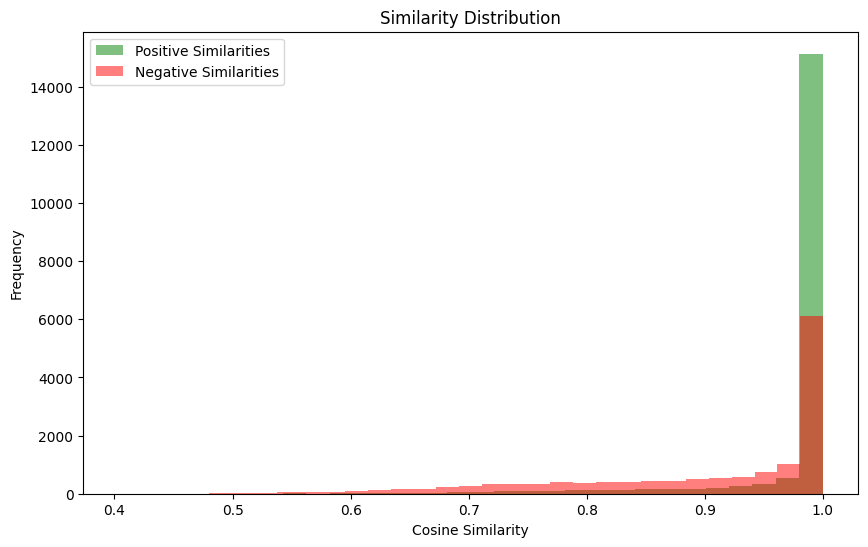

In [9]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân phối độ tương đồng
plt.figure(figsize=(10, 6))
plt.hist(positive_similarities, bins=30, alpha=0.5, label='Positive Similarities', color='g')
plt.hist(negative_similarities, bins=30, alpha=0.5, label='Negative Similarities', color='r')
plt.title('Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
def find_optimal_threshold(positive_similarities, negative_similarities):
    # Tính ngưỡng trung bình
    mean_positive = np.mean(positive_similarities)
    mean_negative = np.mean(negative_similarities)

    # Ngưỡng tối ưu có thể là giá trị trung bình giữa hai giá trị này
    optimal_threshold = (mean_positive + mean_negative) / 2
    return optimal_threshold

# Tìm ngưỡng tối ưu
optimal_threshold = find_optimal_threshold(positive_similarities, negative_similarities)
print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.94
